In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

In [3]:
sys.path.append('script')

In [4]:
from script import dbconn

In [5]:
pgconn = dbconn.db_connection_psycopg()
print(pgconn)

<connection object at 0x7f4911ccbb80; dsn: 'user=postgres password=xxx dbname=telecom host=localhost port=5432', closed: 0>


In [6]:
df_telecom = dbconn.db_read_table_psycopg(pgconn, 'xdr_data')
df_telecom.head(2)

/home/lillian/Documents/TenAcadamyTasks/Databases/script/dbconn.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql, pgconn)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0


In [7]:
df_telecom.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [8]:
engine_conn = dbconn.db_connection_sqlalchemy()

In [9]:
df1 = dbconn.db_read_table_sqlalchemy(engine_conn, 'xdr_data')
print(df1)

           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.08

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [11]:
df_clean = df1[['Bearer Id', 'Start']]

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Bearer Id  149010 non-null  float64
 1   Start      150000 non-null  object 
dtypes: float64(1), object(1)
memory usage: 2.3+ MB


In [13]:
# df1.to_sql('clean_data', engine_conn)
df_clean_data = pd.read_sql_table('clean_data', engine_conn)
df_clean_data.head(10)

,index,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
5,5,1.311448e+19,4/12/2019 21:37,439.0,4/25/2019 8:08,553.0,1074638.0,2.082014e+14,3.366819e+10,3.529841e+13,...,21332918.0,2611113.0,7345361.0,6536448.0,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0
6,6,1.311448e+19,4/13/2019 8:41,612.0,4/25/2019 8:16,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,...,7234465.0,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0
7,7,1.304243e+19,4/14/2019 2:11,592.0,4/25/2019 2:26,512.0,951292.0,2.082010e+14,3.376349e+10,8.654640e+13,...,12189786.0,19735183.0,6858496.0,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0
8,8,1.311448e+19,4/14/2019 12:48,121.0,4/25/2019 10:22,960.0,941634.0,2.082014e+14,3.369874e+10,3.556241e+13,...,18436641.0,10860867.0,10587264.0,8467177.0,821671285.0,6548349.0,172920486.0,14749031.0,42363146.0,861612261.0
9,9,1.304243e+19,4/15/2019 0:32,0.0,4/25/2019 0:40,284.0,864482.0,2.082003e+14,3.365922e+10,3.557311e+13,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0


In [14]:
df_clean.describe()

,Bearer Id
count,1.490100e+05
mean,1.013887e+19
std,2.893173e+18
min,6.917538e+18
25%,7.349883e+18
50%,7.349883e+18
75%,1.304243e+19
max,1.318654e+19


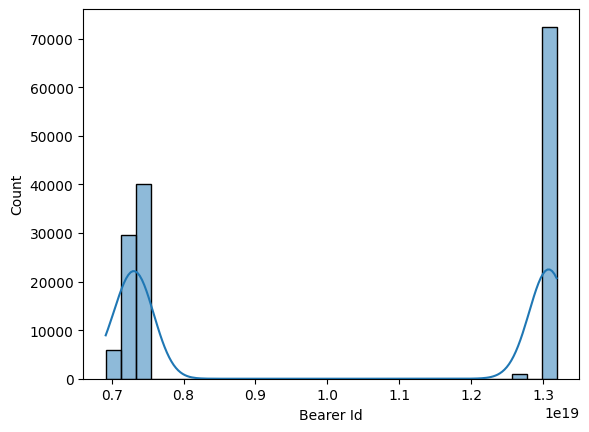


KeyboardInterrupt



In [15]:
sns.histplot(df_clean['Bearer Id'], bins=30, kde=True)
plt.show()
# Distribution of Start times
sns.histplot(df_clean['Start'], bins=30, kde=True)
plt.xticks(rotation=45)
plt.show()

In [16]:
df_clean.isnull().sum()

Bearer Id    991
Start          1
dtype: int64

In [17]:
top_handsets = df_telecom['Handset Type'].value_counts().head(10)
print("The top 10 handsets used by customers:")
print(top_handsets)

The top 10 handsets used by customers:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [16]:
top_manufacturers = df_clean_data['Handset Manufacturer'].value_counts().head(3)
print("The top 3 HandSet Manufacturers are:")
print(top_manufacturers)

The top 3 HandSet Manufacturers are:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [17]:
top_manufacturer_names = top_manufacturers.index

top_manufactuerer_df = df_clean_data[df_clean_data['Handset Manufacturer'].isin(top_manufacturer_names)]

top_handsets_per_manufacturer = top_manufactuerer_df.groupby(['Handset Manufacturer', 'Handset Type']).size().groupby('Handset Manufacturer').nlargest(5)

print("Top 5 handsets per top 3 handset manufactureres:")
print(top_handsets_per_manufacturer)

Top 5 handsets per top 3 handset manufactureres:
Handset Manufacturer  Handset Manufacturer  Handset Type                  
Apple                 Apple                 Apple iPhone 6S (A1688)            9419
                                            Apple iPhone 6 (A1586)             9023
                                            Apple iPhone 7 (A1778)             6326
                                            Apple iPhone Se (A1723)            5187
                                            Apple iPhone 8 (A1905)             4993
Huawei                Huawei                Huawei B528S-23A                  19752
                                            Huawei E5180                       2079
                                            Huawei P20 Lite Huawei Nova 3E     2021
                                            Huawei P20                         1480
                                            Huawei Y6 2018                      997
Samsung               Samsung       

In [18]:
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
user_aggregation = pd.DataFrame()
grouped_by_user = df_clean_data.groupby('MSISDN/Number')
for app in applications:
    # Count the number of xDR sessions
    user_aggregation[f'{app}_Sessions'] = grouped_by_user['Bearer Id'].count()
    
    # Sum the session duration
    user_aggregation[f'{app}_Session_Duration'] = grouped_by_user['Dur. (ms)'].sum()
    
    # Sum the total download (DL) and upload (UL) data
    user_aggregation[f'{app}_Total_DL'] = grouped_by_user[f'{app} DL (Bytes)'].sum()
    user_aggregation[f'{app}_Total_UL'] = grouped_by_user[f'{app} UL (Bytes)'].sum()

    # Sum the total data volume (in Bytes) during this session for each application
    user_aggregation[f'{app}_Total_Volume'] = user_aggregation[f'{app}_Total_DL'] + user_aggregation[f'{app}_Total_UL']

# Reset the index to have 'MSISDN/Number' as a regular column
user_aggregation.reset_index(inplace=True)

# Display the aggregated information
print(user_aggregation)

        MSISDN/Number  Social Media_Sessions  Social Media_Session_Duration  \
0        3.360100e+10                      1                       116720.0   
1        3.360100e+10                      1                       181230.0   
2        3.360100e+10                      1                       134969.0   
3        3.360101e+10                      1                        49878.0   
4        3.360101e+10                      2                        37104.0   
...               ...                    ...                            ...   
106851   3.379000e+10                      1                         8810.0   
106852   3.379000e+10                      1                       140988.0   
106853   3.197021e+12                      1                       877385.0   
106854   3.370000e+14                      1                       253030.0   
106855   8.823971e+14                      1                       869844.0   

        Social Media_Total_DL  Social Media_Total_U

In [19]:

df_clean_data['Start'] = pd.to_datetime(df_clean_data['Start'])

# Aggregate per user
user_aggregation = {
    'number_of_sessions': ('Bearer Id', 'count'),
    'session_duration': ('Dur. (ms)', 'sum'),
    'total_DL_data': ('Total DL (Bytes)', 'sum'),
    'total_UL_data': ('Total UL (Bytes)', 'sum'),
}

app_columns = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']

for app in app_columns:
    user_aggregation[f'{app}_data'] = (f'{app} DL (Bytes)', 'sum')

user_data_aggregated = df_clean_data.groupby('MSISDN/Number').agg(**user_aggregation).reset_index()

# Display the aggregated user data
user_data_aggregated.head(30)



,MSISDN/Number,number_of_sessions,session_duration,total_DL_data,total_UL_data,Social Media_data,Google_data,Email_data,Youtube_data,Netflix_data,Gaming_data,Other_data
0,3.360100e+10,1,116720.0,8.426375e+08,36053108.0,2206504.0,3337123.0,837400.0,14900201.0,10265105.0,8.110911e+08,3.770970e+08
1,3.360100e+10,1,181230.0,1.207552e+08,36104459.0,2598548.0,4197697.0,2828821.0,5324251.0,770569.0,1.050353e+08,2.795577e+08
2,3.360100e+10,1,134969.0,5.566597e+08,39306820.0,3148004.0,3343483.0,2436500.0,2137272.0,16525919.0,5.290685e+08,4.950865e+08
3,3.360101e+10,1,49878.0,4.019932e+08,20327526.0,251469.0,5937765.0,2178618.0,4393123.0,1157362.0,3.880748e+08,2.524800e+07
4,3.360101e+10,2,37104.0,1.363130e+09,94280527.0,2861230.0,13728668.0,2247808.0,10339971.0,24971647.0,1.308981e+09,7.776437e+08
5,3.360101e+10,2,253983.0,5.552080e+08,60009249.0,3787122.0,11993496.0,6513834.0,12169742.0,14569029.0,5.061747e+08,4.803586e+08
6,3.360101e+10,2,128360.0,5.530412e+08,101681858.0,2707339.0,4346088.0,736446.0,2990819.0,12813052.0,5.294475e+08,2.051954e+08
7,3.360101e+10,1,86399.0,2.940851e+08,38575279.0,1740000.0,11036391.0,1280558.0,5100103.0,1392985.0,2.735350e+08,1.781130e+08
8,3.360101e+10,2,495702.0,8.965602e+08,93572016.0,5206619.0,11046222.0,3666031.0,41189830.0,27418209.0,8.080333e+08,1.026521e+09
9,3.360102e+10,1,124854.0,6.853728e+08,47091008.0,938582.0,11098762.0,1986925.0,13624376.0,22460852.0,6.352633e+08,1.337412e+08


In [21]:
data_description = df_clean_data.dtypes.reset_index()
data_description.columns = ['Variable', 'Data Type']

# Display the data description
data_description

,Variable,Data Type
0,index,int64
1,Bearer Id,float64
2,Start,datetime64[ns]
3,Start ms,float64
4,End,object
5,End ms,float64
6,Dur. (ms),float64
7,IMSI,float64
8,MSISDN/Number,float64
9,IMEI,float64


In [22]:
# Conduct Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable
dispersion_parameters = df_clean_data.groupby('MSISDN/Number').agg({'Dur. (ms)': 'std', 'Total UL (Bytes)': 'std', 'Total DL (Bytes)': 'std'}).reset_index()
dispersion_parameters.columns = ['MSISDN/Number', 'Duration_STD', 'Total_UL_STD', 'Total_DL_STD']

# Display dispersion parameters
dispersion_parameters


,MSISDN/Number,Duration_STD,Total_UL_STD,Total_DL_STD
0,3.360100e+10,NaN,NaN,NaN
1,3.360100e+10,NaN,NaN,NaN
2,3.360100e+10,NaN,NaN,NaN
3,3.360101e+10,NaN,NaN,NaN
4,3.360101e+10,4.242641,1.224544e+07,1.901669e+08
...,...,...,...,...
106851,3.379000e+10,NaN,NaN,NaN
106852,3.379000e+10,NaN,NaN,NaN
106853,3.197021e+12,NaN,NaN,NaN
106854,3.370000e+14,NaN,NaN,NaN


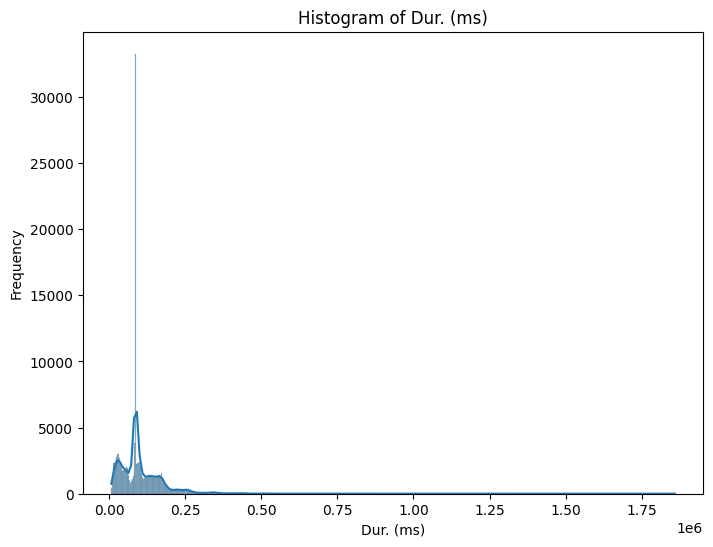

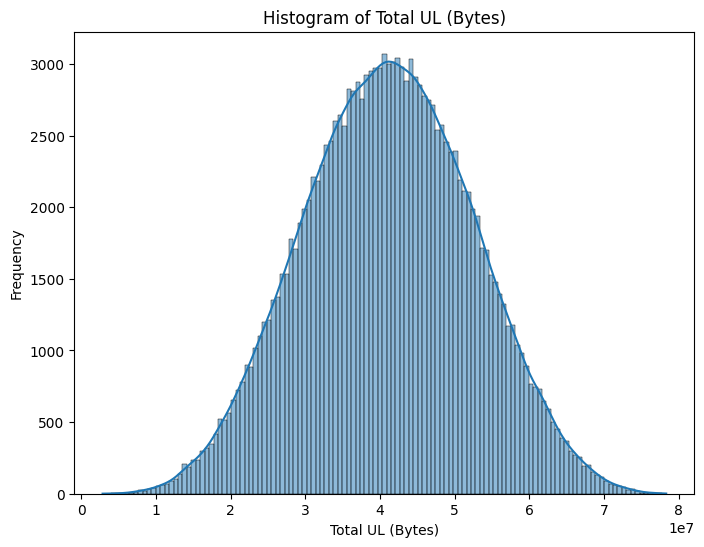

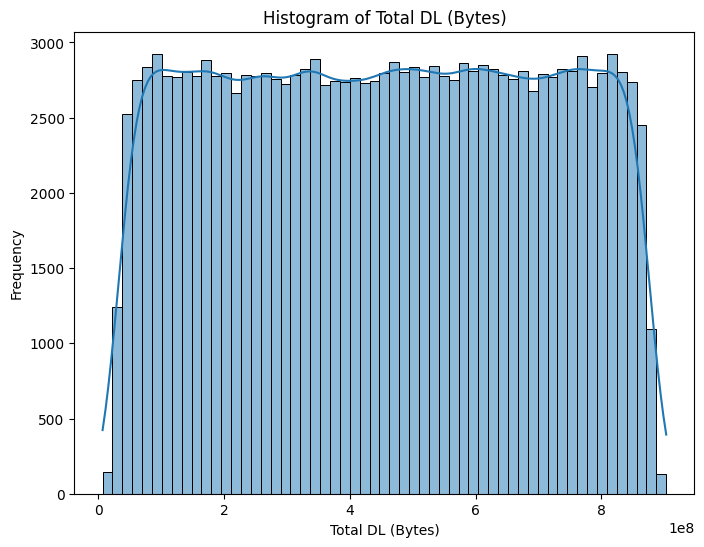

In [23]:
# Conduct Graphical Univariate Analysis
# Identify the most suitable plotting options for each variable
# Let's use histograms for demonstration
for column in ['Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)']:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_clean_data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


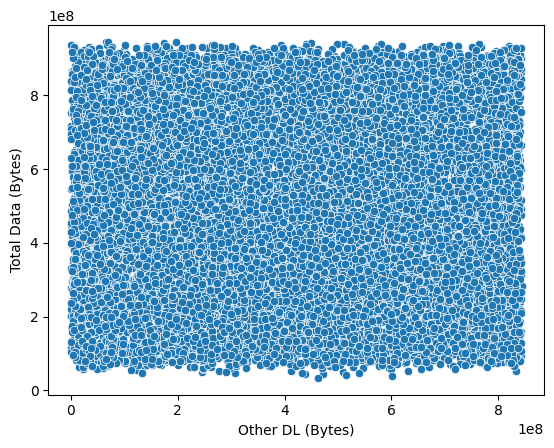

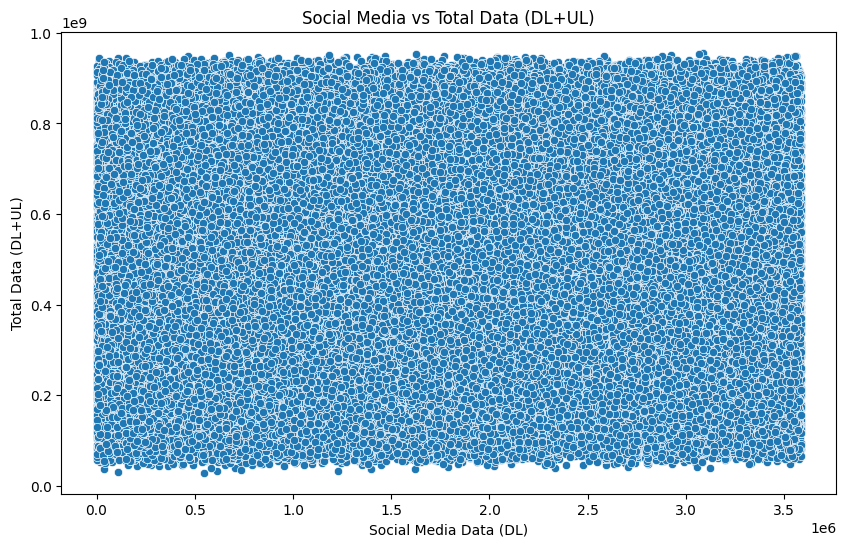

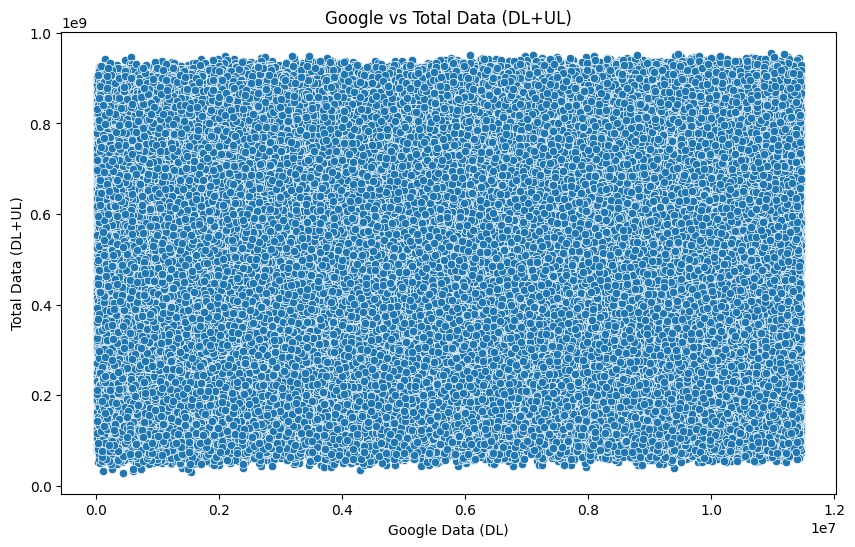

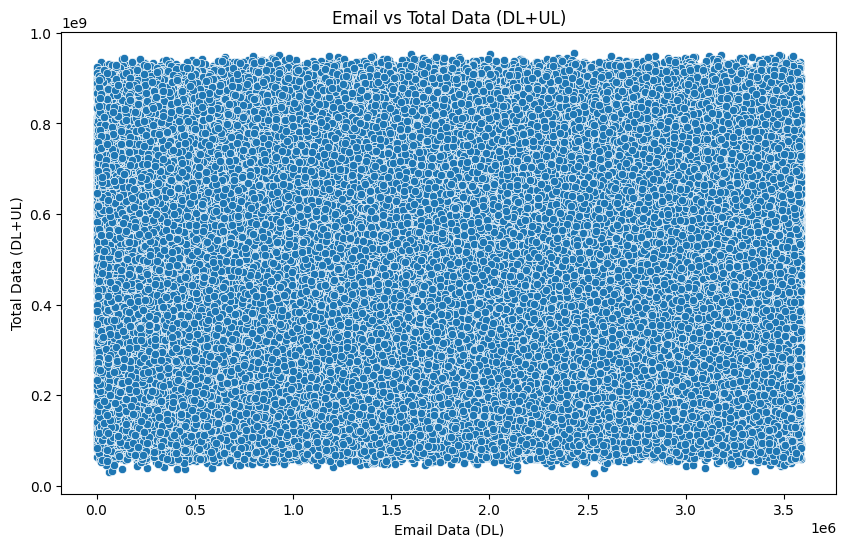

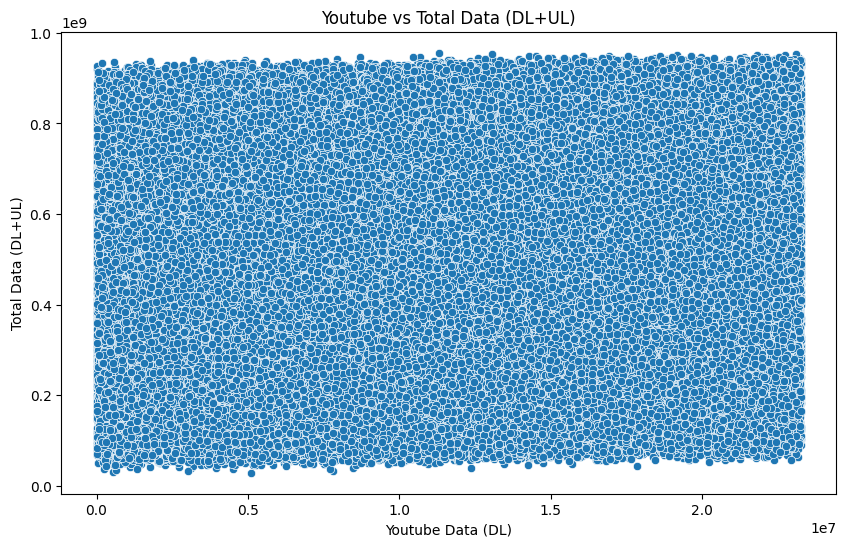

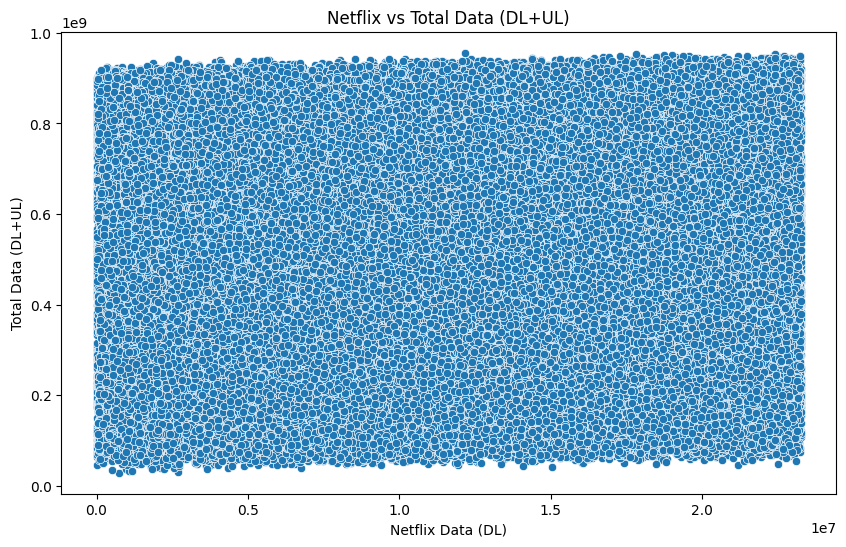

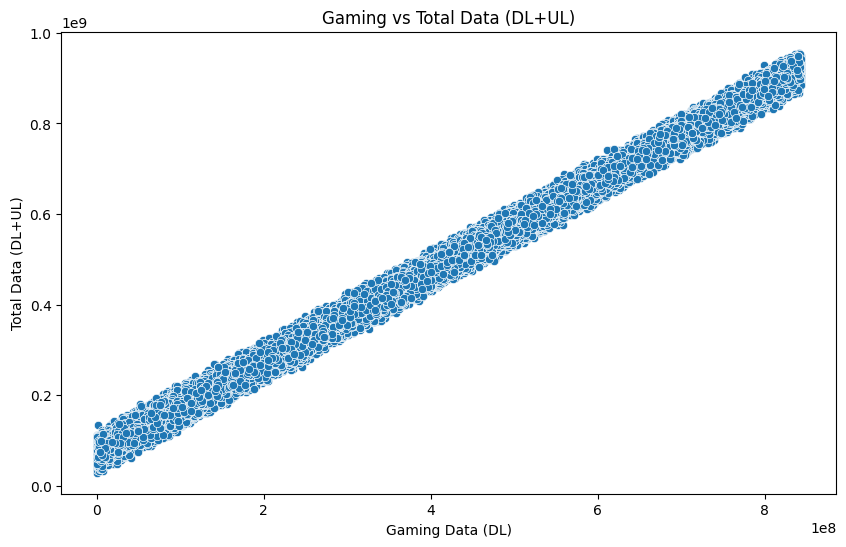

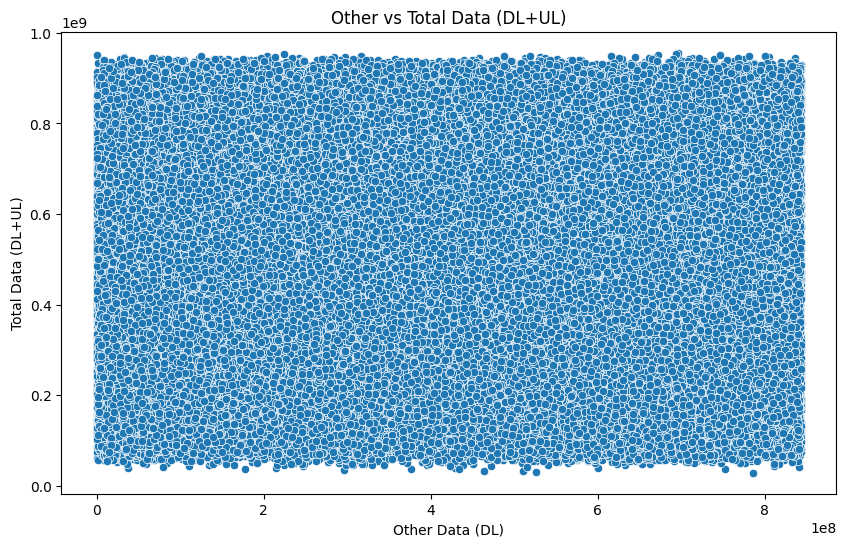

In [35]:
# Create a new column for total data (DL+UL)
sampled_data = df_clean_data.sample(frac=0.1)  # Adjust the fraction as needed
sns.scatterplot(data=sampled_data, x=app + ' DL (Bytes)', y='Total Data (Bytes)')

sampled_data['Total Data (Bytes)'] = sampled_data['Total DL (Bytes)'] + sampled_data['Total UL (Bytes)']

# Bivariate Analysis - explore the relationship between each application & the total DL+UL data
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']

for app in applications:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_clean_data, x=app + ' DL (Bytes)', y='Total Data (Bytes)')
    plt.title(f'{app} vs Total Data (DL+UL)')
    plt.xlabel(f'{app} Data (DL)')
    plt.ylabel('Total Data (DL+UL)')
    plt.show()


In [26]:
# Correlation Analysis - compute a correlation matrix
correlation_matrix = df_clean_data[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']].corr()

# Display the correlation matrix
correlation_matrix


,Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes),Total UL (Bytes),Total DL (Bytes)
Social Media DL (Bytes),1.000000,-0.001954,0.004745,-0.001389,-0.001817,0.001018,0.006126,0.004798,0.005164
Google DL (Bytes),-0.001954,1.000000,-0.000039,0.001760,0.000548,-0.001421,-0.002557,-0.001492,0.012189
Email DL (Bytes),0.004745,-0.000039,1.000000,0.001679,0.001351,0.000050,-0.000444,-0.002346,0.004395
Youtube DL (Bytes),-0.001389,0.001760,0.001679,1.000000,0.001202,-0.001861,0.002042,-0.000384,0.025685
Netflix DL (Bytes),-0.001817,0.000548,0.001351,0.001202,1.000000,-0.003201,-0.006000,-0.000662,0.024386
Gaming DL (Bytes),0.001018,-0.001421,0.000050,-0.001861,-0.003201,1.000000,-0.002591,-0.001858,0.999131
Other DL (Bytes),0.006126,-0.002557,-0.000444,0.002042,-0.006000,-0.002591,1.000000,-0.001921,-0.002709
Total UL (Bytes),0.004798,-0.001492,-0.002346,-0.000384,-0.000662,-0.001858,-0.001921,1.000000,-0.001895
Total DL (Bytes),0.005164,0.012189,0.004395,0.025685,0.024386,0.999131,-0.002709,-0.001895,1.000000


In [39]:
imputer = SimpleImputer(strategy='mean')
features_filled = imputer.fit_transform(features_for_pca)

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_filled)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(features_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, len(features_for_pca.columns) + 1)])

# Display the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

# Display principal components DataFrame
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-8.363531e-01,4.052043e-02,-9.491162e-01,7.338040e-01,8.655163e-01,6.917420e-01,1.897801e+00,3.509703e-01,3.608441e-16
1,1.140146e+00,-1.126881e-01,4.930001e-01,3.198599e-01,-1.433562e+00,1.693654e+00,-7.087527e-01,-4.959365e-02,-2.347506e-15
2,-1.018114e+00,9.026687e-01,-2.044349e+00,5.541121e-02,-1.702509e-01,6.676995e-02,-3.537112e-01,1.847642e-01,-1.151241e-15
3,2.252916e+00,3.807061e-01,-8.979347e-01,-1.156210e+00,-1.491934e+00,4.888900e-01,-4.821978e-01,-1.151502e+00,5.471242e-15
4,6.554074e-01,6.652065e-01,-6.466911e-01,-2.961985e-01,-1.469300e-01,6.221649e-01,-3.688108e-01,-7.967131e-01,-3.666966e-15
...,...,...,...,...,...,...,...,...,...
149996,6.884309e-01,7.776066e-01,1.145199e+00,1.467235e+00,-2.267271e+00,-5.746009e-01,-1.007982e+00,1.685794e+00,1.956898e-17
149997,1.220852e+00,-7.989927e-01,-5.325458e-01,4.025412e-01,3.829149e-01,1.362360e+00,-1.043367e+00,-3.546878e-01,-8.566238e-17
149998,8.036495e-01,9.608831e-01,-4.725862e-01,-3.418358e-01,-4.691132e-01,1.108896e+00,1.081224e+00,1.159999e+00,-2.789432e-17
149999,-4.764397e-01,-9.106087e-01,-4.990488e-01,-1.797100e+00,1.094633e+00,6.874883e-02,4.426284e-01,-9.711743e-01,-5.543759e-17


In [42]:
# Aggregate engagement metrics per customer
engagement_metrics = df_clean_data.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'sum',  # Duration of the session
    'Total UL (Bytes)': 'sum',  # Total upload traffic
    'Total DL (Bytes)': 'sum',  # Total download traffic
    'Bearer Id': 'count'  # Sessions frequency
}).reset_index()

# Rename columns for clarity
engagement_metrics.columns = ['MSISDN/Number', 'Total Session Duration', 'Total UL Traffic', 'Total DL Traffic', 'Session Frequency']

# Display the top 10 customers per engagement metric
top_10_duration = engagement_metrics.sort_values('Total Session Duration', ascending=False).head(10)
top_10_ul_traffic = engagement_metrics.sort_values('Total UL Traffic', ascending=False).head(10)
top_10_dl_traffic = engagement_metrics.sort_values('Total DL Traffic', ascending=False).head(10)
top_10_session_frequency = engagement_metrics.sort_values('Session Frequency', ascending=False).head(10)

top_10_duration, top_10_ul_traffic, top_10_dl_traffic, top_10_session_frequency


(       MSISDN/Number  Total Session Duration  Total UL Traffic  \
 13180   3.362578e+10              18553754.0       729577380.0   
 6437    3.361489e+10               9966898.0       689483001.0   
 92923   3.376054e+10               9279434.0       703478581.0   
 13526   3.362632e+10               8791927.0       669650721.0   
 65118   3.366716e+10               8744914.0       566326364.0   
 50281   3.366284e+10               6614270.0       406424372.0   
 57160   3.366469e+10               6288730.0       402180804.0   
 666     3.360313e+10               6287761.0       435587631.0   
 66029   3.366746e+10               5649882.0       266222647.0   
 92577   3.376041e+10               5321667.0       521518890.0   
 
        Total DL Traffic  Session Frequency  
 13180      7.770043e+09                 17  
 6437       8.156743e+09                 17  
 92923      7.811295e+09                 15  
 13526      7.301517e+09                 18  
 65118      5.052068e+09       

In [43]:
# Normalize engagement metrics
scaler = StandardScaler()
normalized_engagement_metrics = scaler.fit_transform(engagement_metrics[['Total Session Duration', 'Total UL Traffic', 'Total DL Traffic', 'Session Frequency']])

# Run k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_metrics['Cluster'] = kmeans.fit_predict(normalized_engagement_metrics)

# Display minimum, maximum, average, and total non-normalized metrics for each cluster
cluster_summary = engagement_metrics.groupby('Cluster').agg({
    'Total Session Duration': ['min', 'max', 'mean', 'sum'],
    'Total UL Traffic': ['min', 'max', 'mean', 'sum'],
    'Total DL Traffic': ['min', 'max', 'mean', 'sum'],
    'Session Frequency': ['min', 'max', 'mean', 'sum']
}).reset_index()

cluster_summary


/home/lillian/anaconda3/envs/weekone/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Total Session Duration                                           \
                             min         max           mean           sum   
0       0                66594.0  18553754.0  635561.260670  2.352848e+09   
1       1                18235.0   1573420.0  209553.489571  5.153968e+09   
2       2                 7142.0   1042254.0  103260.247623  8.112022e+09   

  Total UL Traffic                                          Total DL Traffic  \
               min          max          mean           sum              min   
0       68496905.0  729577380.0  1.827919e+08  6.766955e+11      404647470.0   
1       23034394.0  197644172.0  8.940058e+07  2.198807e+12       65270746.0   
2        2866892.0  104650587.0  4.134921e+07  3.248353e+12        8827082.0   

                                            Session Frequency                \
            max          mean           sum               min max      mean   
0  8.156743e+09  2.068793e+09  7.658671e+12                 2  18  4.401675   
1  2.409217e+09  9.883407e+08  2.430824e+13                 1   4  2.162675   
2  1.322450e+09  4.549788e+08  3.574268e+13                 0   2  1.005868   

          
     sum  
0  16295  
1  53191  
2  79020

In [45]:
# Aggregate user total traffic per application
app_traffic = df_clean_data.groupby('MSISDN/Number').agg({
    'Social Media DL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
}).reset_index()

# Correct column names for aggregation
app_traffic.columns = ['MSISDN/Number', 'Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other',
                       'Social Media UL', 'Google UL', 'Email UL', 'Youtube UL', 'Netflix UL', 'Gaming UL', 'Other UL']

# Display the top 10 most engaged users per application
top_10_social_media = app_traffic.sort_values(['Social Media', 'Social Media UL'], ascending=False).head(10)
top_10_google = app_traffic.sort_values(['Google', 'Google UL'], ascending=False).head(10)
top_10_youtube = app_traffic.sort_values(['Youtube', 'Youtube UL'], ascending=False).head(10)

top_10_social_media, top_10_google, top_10_youtube


(        MSISDN/Number  Social Media       Google       Email      Youtube  \
 13526    3.362632e+10    42743837.0  116106455.0  33404785.0  164048706.0   
 92923    3.376054e+10    39297646.0   88626532.0  26437895.0  194068298.0   
 37052    3.365973e+10    34900444.0   90958549.0  29907647.0  119658146.0   
 6437     3.361489e+10    27749744.0   93941708.0  33607211.0  199823443.0   
 13180    3.362578e+10    26564121.0  107904739.0  31895412.0  237883033.0   
 65118    3.366716e+10    23753753.0   71707826.0  23276752.0  141972692.0   
 106137   3.378632e+10    23568655.0   78819810.0  30876908.0  118129859.0   
 70960    3.366907e+10    23477047.0   54915216.0  17813584.0  136295265.0   
 666      3.360313e+10    22776679.0   73942055.0  20343728.0  158976704.0   
 31331    3.365849e+10    22695673.0   55457602.0  15004556.0   64799443.0   
 
             Netflix        Gaming         Other  Social Media UL   Google UL  \
 13526   199479238.0  6.745734e+09  8.025477e+09         63

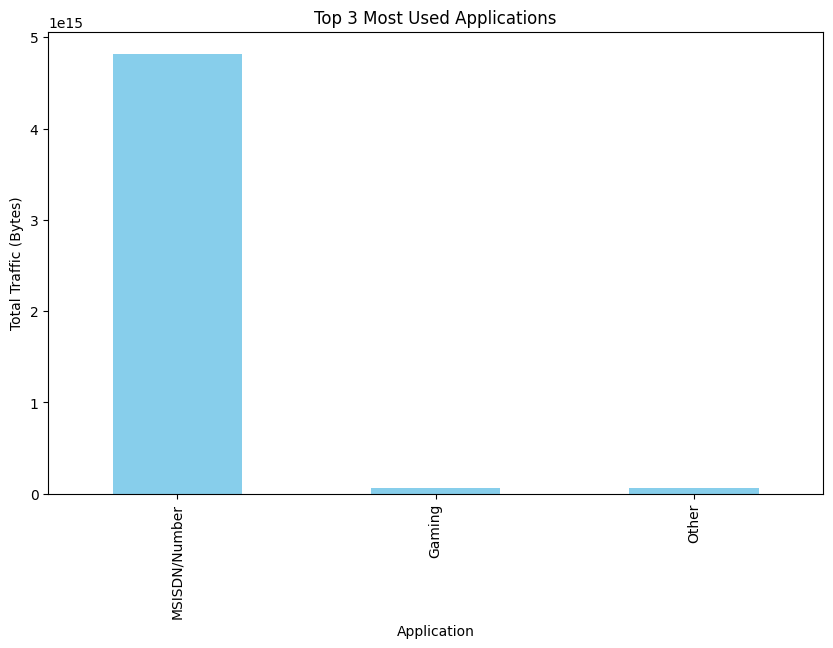

In [46]:
# Plot the top 3 most used applications
top_3_apps = app_traffic.sum().sort_values(ascending=False).head(3)
plt.figure(figsize=(10, 6))
top_3_apps.plot(kind='bar', color='skyblue')
plt.title('Top 3 Most Used Applications')
plt.xlabel('Application')
plt.ylabel('Total Traffic (Bytes)')
plt.show()


In [47]:
from yellowbrick.cluster import KElbowVisualizer

# Fit the KElbowVisualizer on the normalized engagement metrics data
visualizer = KElbowVisualizer(KMeans(), k=(2, 10), metric='distortion')
visualizer.fit(normalized_engagement_metrics)
visualizer.show()


ModuleNotFoundError: No module named 'yellowbrick'